In [1]:
import sys
print(sys.executable)

# code to generate yearly summaries of DUNE data volumes from input parameters
# rewritten from the version in the CDR - mainly by using maps of years instead of arrays to make it clearer what is in each year.
# HMS 2022-10-23

# if you have json problems, run the program ../strip.py on your file to take off comments
# and then test using https://jsonlint.com
#import numberutils

import os,commentjson

from csv import reader
import json
#import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors

/Users/schellma/miniforge3/envs/my_root_env/bin/python


In [2]:
DEBUG = False
DRAW = True
import numpy as np
#import scipy
import dunestyle.matplotlib as dunestyle

from NumberUtils import dump
from NumberUtils import DrawTex
from NumberUtils import cumulateMap
from NumberUtils import DrawDet
from NumberUtils import DrawType
from NumberUtils import makeArray
from NumberUtils import ToCSV1
from NumberUtils import ToCSV2
from NumberUtils import SumOver1
from NumberUtils import SumOver2
from NumberUtils import TableTex
from NumberUtils import BothTex
from NumberUtils import extendMap
from NumberUtils import makeParameter

from DataHolder import DataHolder

DUNE plot style enabled


In [3]:
# how many histograms to draw in multi-hist plots
N_HISTS = 8   # exhibits all the colors in the Okabe-Ito cycler


# # specify the json file here.  Will create a subdirectory for plots with a similar name

# ## 

# "Tex"# read in a 
# file
# #configfilename = "Parameters_2022-11-21-2040.json"
# 
# #configfilename = "DOE23-NDLAr_2023-11-03-2040b.json"
# #configfilename = "DOE23-NDLAr_2023-12-11-2040.json"  # increase sim for ND

# In[ ]:


configfilename = "NearTerm_2024-08-09-2040.json"
#if len(sys.argv) > 1:
#  configfile = sys.argv[1]

In [4]:
shortname = configfilename.replace(".json","")
if os.path.exists(configfilename):
    with open(configfilename,'r') as f:
        #x = f.read()
        #print (x[6000:6960])
        config = commentjson.load(f)
else:
    print ("no config file",configfilename)
    sys.exit(0)

if not "Version" in config or config["Version"] < 20:
    print (" this code expects Version >= 20")
    sys.exit(1)


MWCWeight = config["MWCWeight"] # do we weight cores by available memory? 
MaxYear = config["MaxYear"]
MWCstring = "_noMWC"
if MWCWeight: MWCstring=""
config["filename"] = configfilename
MinYear = config["MinYear"]
Detectors = config["Detectors"]
Years = config["Years"]

shortname = shortname.replace("2040","%d"%MaxYear)+MWCstring
dirname = shortname
if not os.path.exists(dirname):
    os.mkdir(dirname)
shortname = dirname+"/"+dirname
# make a tex output file
texfilename = dirname+".tex"
texfile = open(texfilename,'w')
tablefile = open(os.path.join(dirname,"tables.tex"),'w')
#texfile.write("\\input{Header.tex}\n")



size = len(Years)

Units = config["Units"]

RequestYear=2024
if "RequestYear" in config:
    RequestYear= config["RequestYear"]

# if not MWCWeight: 
#     print ("remove MWC")
#     for type in Units.keys():
#         Units[type] = Units[type].replace("MWC-","")
#         Units[type] = Units[type].replace("Memory weighted ","")
#         Units[type] = Units[type].replace("Memory Weighted ","")
#     print ("Units", Units)
        
Formats = config["Formats"]

Detectors = config["Detectors"]

DataTypes = config["DataTypes"]
NativeTypes = config["NativeTypes"]
Resources = config["Resources"]
Locations = config["Locations"]
Scales = config["Scales"]
Cap = config["Cap"]

BaseMemory = config["Base-Memory"]


print (Detectors)

CombinedDetectors = config["CombinedDetectors"]

DetectorParameters = list(config["SP"].keys())

print ("Parameters",DetectorParameters)


if "Comment" in DetectorParameters:
    DetectorParameters.remove("Comment")

TapeLifetimes = config["TapeLifetimes"]

DiskLifetimes = config["DiskLifetimes"]

TapeCopies = config["TapeCopies"]

DiskCopies = config["DiskCopies"]

# this is how far you go back each time you reprocess reco.
Reprocess = config["Reprocess"]

AnalysisExtend = config["AnalysisExtend"]

PerYear = config["PerYear"]

StorageTypes = list(TapeCopies.keys())

print (StorageTypes)
# plot config
DetColors=config["DetColors"]
DetLines = config["DetLines"]
TypeColors=config["TypeColors"]
TypeLines = config["TypeLines"]

PatternFraction = config["PatternFraction"]

SplitsYear = config["SplitsYear"]
SplitsEarly = config["SplitsEarly"]
SplitsLater = config["SplitsLater"]

Explain = config["Explain"]
Explain["filename"] = "Input configuration file"


for f in Explain.keys():

    field = "{\\tt %s:} %s = {\\tt %s} \\\\\n"%(f,Explain[f], config[f])
    field = field.replace("_","\_")
    tablefile.write(field)
    print (Explain[f])

['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
Parameters ['Comment', 'Raw-Data-Store', 'Reco-Data-CPU', 'Reco-Sim-CPU', 'Reco-Data-GPU', 'Reco-Sim-GPU', 'Reco-Data-Store', 'Reco-Sim-Store', 'Reco-Memory', 'Sim-Memory', 'Analysis-CPU']
['Raw-Data-Store', 'Test', 'Reco-Data-Store', 'Reco-Sim-Store']
Detectors included in the calculation
Cap on Raw data per year in PB
MB of memory per slot assumed as the average
Plot until year
Plot starting with year
Number of years of data reprocessed when doing a new pass
Years analysis continues after last reco/sim
Fraction of time taken in pattern recognition
Number of years kept on tape
Number of years kept on disk
Number of copies kept on tape
Number of copies kept on disk
Number of reprocessing done per year
Description of slots, efficiency and speed relative to 2020 vintage
kHEPSPEC06 per core assumed
Year CERN no longer responsible for disk or tape
Division between FNAL/CERN/Global for storage until SplitsYear
Division be

## Make data container (holder)

## Make data container (holder)

In [5]:
holder = DataHolder(theconfig=config,debug=DEBUG)
holder.readTimeline()

csvname = configfilename.replace(".json",".csv")
csvData = holder.csvDump(csvname)


holder.jsonDump(configfilename.replace(".json","safe.json"))


holder.debug=True

print ("Detector Parameters",DetectorParameters)

detectors ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
Timeline from  NearTerm_2024-07-12-2040_timeline.csv
['SP', 'Raw-Events', 'input', 'ALL', 'Million', '10.9', '19.4', '6.5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['SP', 'Test', 'input', 'ALL', 'TB', '157', '600', '500', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['SP', 'Sim-Events', 'input', 'ALL', 'Million', '1.3', '5', '5', '10', '5', '5', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['PDHD', 'Raw-Events', 'input', 'ALL', 'Million', '0', '0', '0', '0', '0', '0', '20', '5', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['PDHD', 'TP', 'input', 'ALL', 'TB', '0', '0', '0', '0', '0', '0', '1000', '1000', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['PDHD', 'Test', 'input', 'ALL', 'TB', '0', '0',

# Change input (NativeTypes) into storage numbers

In [6]:
# fill in other useful arrays


for detector in Detectors:
    print ("--------------- raw-storage ------------------")

    # first raw data events which have to be stored. 
    # Make "input" locations in to "Store" scled by config[detector][type]
    for olddatatype in config["NativeTypes"]:
        oldunits = Scales[olddatatype]
        oldresource = "input"
        newresource = "Store"
        location = "ALL"
                 
        if holder.hasTag(detector,olddatatype,oldresource,location,oldunits):
            holder.printByTag(holder.tag(detector,olddatatype,oldresource,location,oldunits))
            factor = 1
            if olddatatype == "Raw-Events":
                newdatatype = "Raw-Data"
                factor = config[detector]["Raw-Data-Store"]
                newunits = Scales["Raw-Data-Store"]
            else:
                newdatatype = olddatatype
                newunits = oldunits
            # TP and Test are already in units of GB
            # if DEBUG: print ("storage",detector,olddatatype,newresource,location,newunits,factor)
            newtag = holder.scale(detector,olddatatype,oldresource,location,oldunits,{"DataTypes":newdatatype,"Resources":newresource,"Units":newunits},factor)
            holder.printByTag(newtag)
        else:
            print ("could not find", detector,olddatatype,oldresource,location,oldunits)

   

holder.csvDump("after-raw.csv")

--------------- raw-storage ------------------

 SP!Raw-Events!input!ALL!Million {2018: 10.9, 2019: 19.4, 2020: 6.5, 2021: 0.0, 2022: 0.0, 2023: 0.0, 2024: 0.0, 2025: 0.0, 2026: 0.0, 2027: 0.0, 2028: 0.0, 2029: 0.0, 2030: 0.0, 2031: 0.0, 2032: 0.0, 2033: 0.0, 2034: 0.0, 2035: 0.0, 2036: 0.0, 2037: 0.0, 2038: 0.0, 2039: 0.0, 2040: 0.0}
scale: SP!Raw-Events!input!ALL!Million
SP!Raw-Events!input!ALL!Million
scale 70
newscale 10.9 763.0
SP!Raw-Data!Store!ALL!TB

 SP!Raw-Data!Store!ALL!TB {2018: 763.0, 2019: 1358.0, 2020: 455.0, 2021: 0.0, 2022: 0.0, 2023: 0.0, 2024: 0.0, 2025: 0.0, 2026: 0.0, 2027: 0.0, 2028: 0.0, 2029: 0.0, 2030: 0.0, 2031: 0.0, 2032: 0.0, 2033: 0.0, 2034: 0.0, 2035: 0.0, 2036: 0.0, 2037: 0.0, 2038: 0.0, 2039: 0.0, 2040: 0.0}
could not find SP TP input ALL TB

 SP!Test!input!ALL!TB {2018: 157.0, 2019: 600.0, 2020: 500.0, 2021: 0.0, 2022: 0.0, 2023: 0.0, 2024: 0.0, 2025: 0.0, 2026: 0.0, 2027: 0.0, 2028: 0.0, 2029: 0.0, 2030: 0.0, 2031: 0.0, 2032: 0.0, 2033: 0.0, 2034: 0.0,

[{'detector': 'SP',
  'datatype': 'Raw-Events',
  'resource': 'input',
  'location': 'ALL',
  'units': 'Million',
  2018: 10.9,
  2019: 19.4,
  2020: 6.5,
  2021: 0.0,
  2022: 0.0,
  2023: 0.0,
  2024: 0.0,
  2025: 0.0,
  2026: 0.0,
  2027: 0.0,
  2028: 0.0,
  2029: 0.0,
  2030: 0.0,
  2031: 0.0,
  2032: 0.0,
  2033: 0.0,
  2034: 0.0,
  2035: 0.0,
  2036: 0.0,
  2037: 0.0,
  2038: 0.0,
  2039: 0.0,
  2040: 0.0},
 {'detector': 'SP',
  'datatype': 'Test',
  'resource': 'input',
  'location': 'ALL',
  'units': 'TB',
  2018: 157.0,
  2019: 600.0,
  2020: 500.0,
  2021: 0.0,
  2022: 0.0,
  2023: 0.0,
  2024: 0.0,
  2025: 0.0,
  2026: 0.0,
  2027: 0.0,
  2028: 0.0,
  2029: 0.0,
  2030: 0.0,
  2031: 0.0,
  2032: 0.0,
  2033: 0.0,
  2034: 0.0,
  2035: 0.0,
  2036: 0.0,
  2037: 0.0,
  2038: 0.0,
  2039: 0.0,
  2040: 0.0},
 {'detector': 'SP',
  'datatype': 'Sim-Events',
  'resource': 'input',
  'location': 'ALL',
  'units': 'Million',
  2018: 1.3,
  2019: 5.0,
  2020: 5.0,
  2021: 10.0,
  2022: 

# calculate size of raw data coming from detector 

sumover ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
{'Detectors': ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS'], 'DataTypes': ['Raw-Data', 'TP', 'Test'], 'Resources': 'Store', 'Locations': 'ALL'}
maketagset: {'Detectors': ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS'], 'DataTypes': ['Raw-Data', 'TP', 'Test'], 'Resources': 'Store', 'Locations': 'ALL'}
maketagset: Detectors SP ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
maketagset: DataTypes Raw-Events ['Raw-Data', 'TP', 'Test']
match fails
maketagset: Detectors SP ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
maketagset: DataTypes Test ['Raw-Data', 'TP', 'Test']
maketagset: Resources input Store
match fails
maketagset: Detectors SP ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
maketagset: DataTypes Sim-Events ['Raw-Data', 'TP', 'Test']
match fails
maketagset: Detectors PDHD ['SP', 'PDHD', 'DP

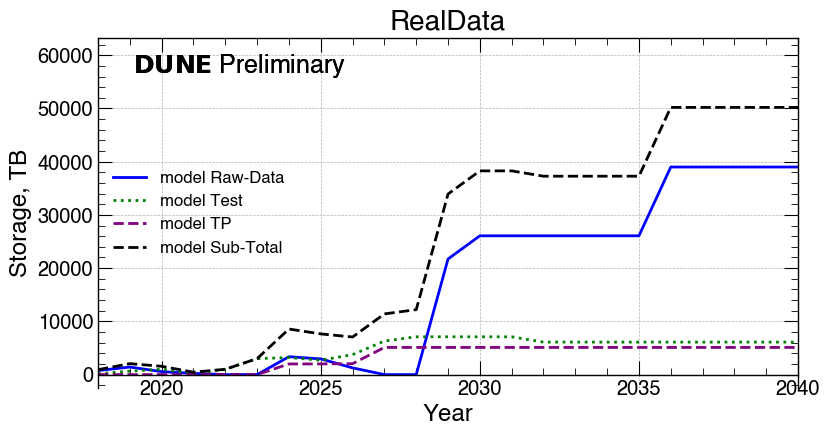

SP!Raw-Events!input!ALL!Million
SP!Test!input!ALL!TB
SP!Sim-Events!input!ALL!Million
PDHD!Raw-Events!input!ALL!Million
PDHD!TP!input!ALL!TB
PDHD!Test!input!ALL!TB
PDHD!Sim-Events!input!ALL!Million
DP!Raw-Events!input!ALL!Million
DP!Test!input!ALL!TB
DP!Sim-Events!input!ALL!Million
PDVD!Raw-Events!input!ALL!Million
PDVD!TP!input!ALL!TB
PDVD!Test!input!ALL!TB
PDVD!Sim-Events!input!ALL!Million
FDHD!Raw-Events!input!ALL!Million
FDHD!TP!input!ALL!TB
FDHD!Test!input!ALL!TB
FDHD!Sim-Events!input!ALL!Million
FDVD!Raw-Events!input!ALL!Million
FDVD!TP!input!ALL!TB
FDVD!Test!input!ALL!TB
FDVD!Sim-Events!input!ALL!Million
ND-SAND!Raw-Events!input!ALL!Million
ND-SAND!Test!input!ALL!TB
ND-SAND!Sim-Events!input!ALL!Million
ND-LAr+TMS!Raw-Events!input!ALL!Million
ND-LAr+TMS!Test!input!ALL!TB
ND-LAr+TMS!Sim-Events!input!ALL!Million
SP!Raw-Data!Store!ALL!TB
SP!Test!Store!ALL!TB
PDHD!Raw-Data!Store!ALL!TB
PDHD!TP!Store!ALL!TB
PDHD!Test!Store!ALL!TB
DP!Raw-Data!Store!ALL!TB
DP!Test!Store!ALL!TB
PDVD!Raw-D

[{'detector': 'SP',
  'datatype': 'Raw-Events',
  'resource': 'input',
  'location': 'ALL',
  'units': 'Million',
  2018: 10.9,
  2019: 19.4,
  2020: 6.5,
  2021: 0.0,
  2022: 0.0,
  2023: 0.0,
  2024: 0.0,
  2025: 0.0,
  2026: 0.0,
  2027: 0.0,
  2028: 0.0,
  2029: 0.0,
  2030: 0.0,
  2031: 0.0,
  2032: 0.0,
  2033: 0.0,
  2034: 0.0,
  2035: 0.0,
  2036: 0.0,
  2037: 0.0,
  2038: 0.0,
  2039: 0.0,
  2040: 0.0},
 {'detector': 'SP',
  'datatype': 'Test',
  'resource': 'input',
  'location': 'ALL',
  'units': 'TB',
  2018: 157.0,
  2019: 600.0,
  2020: 500.0,
  2021: 0.0,
  2022: 0.0,
  2023: 0.0,
  2024: 0.0,
  2025: 0.0,
  2026: 0.0,
  2027: 0.0,
  2028: 0.0,
  2029: 0.0,
  2030: 0.0,
  2031: 0.0,
  2032: 0.0,
  2033: 0.0,
  2034: 0.0,
  2035: 0.0,
  2036: 0.0,
  2037: 0.0,
  2038: 0.0,
  2039: 0.0,
  2040: 0.0},
 {'detector': 'SP',
  'datatype': 'Sim-Events',
  'resource': 'input',
  'location': 'ALL',
  'units': 'Million',
  2018: 1.3,
  2019: 5.0,
  2020: 5.0,
  2021: 10.0,
  2022: 

In [7]:
RealDataTypes=["Raw-Data","TP","Test"]

realsubset={"Detectors":Detectors,"DataTypes":RealDataTypes,"Resources":"Store","Locations":"ALL"}

realDataTotalDetector=holder.sumAcrossFilters(
    filter=realsubset,sumCat="Detectors",sumName="Sub-Total")

realsubset2={"Detectors":Detectors+["Sub-Total"],"DataTypes":RealDataTypes,"Resources":"Store","Locations":"ALL"}

realDataTotalDetectorStore=holder.sumAcrossFilters(
    filter=realsubset2,sumCat="DataTypes",sumName="Sub-Total")
    
newsubset={"Detectors":(["Sub-Total"]),"DataTypes":RealDataTypes+["Sub-Total"],"Resources":"Store","Locations":"ALL"}

# holder.storeFilter(newsubset,"real data storage")

# print ("newsubset",holder.makeTagSet(newsubset))

print ("newsubset",holder.makeTagSet(newsubset))
print ("Draw")
holder.Draw(Title="RealData",YAxis="Storage",Category="DataTypes",filter=newsubset)
            
holder.csvDump("realData.csv")

# extend events for Reco and calculate storage/CPU/GPU per year

In [8]:
for detector in Detectors:

    print ("---------------  makereco ------------------") 
    for newdatatype in ["Reco-Data","Reco-Sim"]:
        oldresource = "input"
        if newdatatype == "Reco-Data": 
            olddatatype = "Raw-Events"
        if newdatatype == "Reco-Sim":
            olddatatype = "Sim-Events"
        oldunits = Scales[olddatatype]
        location = "ALL"
        # Reco gets reprocessed so has a special cumulation
        for resource in ["CPU","GPU","Store"]:
            newunits = Scales[newdatatype+"-"+resource]    
            if holder.hasTag(detector,olddatatype,oldresource,location,oldunits):
                holder.printByTag(holder.tag(detector,olddatatype,oldresource,location,oldunits))                 
                if DEBUG: print ("--before Events->Things",olddatatype,resource)
                newunits = Scales[newdatatype+"-"+resource]
                factor = config[detector][newdatatype + "-" +resource]*PerYear[newdatatype+"-"+resource]
                if DEBUG: print ("factor",detector,newdatatype,resource,factor)
                newtag = holder.scale(detector,olddatatype,oldresource,location,oldunits,{"DataTypes":newdatatype,"Resources":resource,"Units":newunits},factor)
                holder.printByTag(newtag)
                if DEBUG: print ("--after Events->Things",newdatatype,resource)

                # special to say you redo previous Reprocess years of reco every year.
                if newdatatype == "Reco-Data":  
                    newtag = holder.cumulateMe(detector,newdatatype,resource,location,newunits,{"DataTypes":"Reco-Data"},Reprocess[detector])   
                           
                # extend both Sim and Data for analysis
                if DEBUG:
                    print ("newtag",newtag)
                    print ("Try to extend", detector,newdatatype,resource,location,newunits)
                if newdatatype in ["Reco-Data","Reco-Sim"]:
                    nwtag = holder.extendMe(detector,newdatatype,resource,location,newunits,{"DataTypes":newdatatype},AnalysisExtend)
                holder.printByTag(newtag)

holder.csvDump("after-reco.csv")

---------------  makereco ------------------

 SP!Raw-Events!input!ALL!Million {2018: 10.9, 2019: 19.4, 2020: 6.5, 2021: 0.0, 2022: 0.0, 2023: 0.0, 2024: 0.0, 2025: 0.0, 2026: 0.0, 2027: 0.0, 2028: 0.0, 2029: 0.0, 2030: 0.0, 2031: 0.0, 2032: 0.0, 2033: 0.0, 2034: 0.0, 2035: 0.0, 2036: 0.0, 2037: 0.0, 2038: 0.0, 2039: 0.0, 2040: 0.0}
scale: SP!Raw-Events!input!ALL!Million
SP!Raw-Events!input!ALL!Million
scale 0.1667
newscale 10.9 1.81703
SP!Reco-Data!CPU!ALL!MHr

 SP!Reco-Data!CPU!ALL!MHr {2018: 1.81703, 2019: 3.2339799999999994, 2020: 1.08355, 2021: 0.0, 2022: 0.0, 2023: 0.0, 2024: 0.0, 2025: 0.0, 2026: 0.0, 2027: 0.0, 2028: 0.0, 2029: 0.0, 2030: 0.0, 2031: 0.0, 2032: 0.0, 2033: 0.0, 2034: 0.0, 2035: 0.0, 2036: 0.0, 2037: 0.0, 2038: 0.0, 2039: 0.0, 2040: 0.0}
test cumulation
precumulate SP!Reco-Data!CPU!ALL!MHr {2018: 1.81703, 2019: 3.2339799999999994, 2020: 1.08355, 2021: 0.0, 2022: 0.0, 2023: 0.0, 2024: 0.0, 2025: 0.0, 2026: 0.0, 2027: 0.0, 2028: 0.0, 2029: 0.0, 2030: 0.0, 2031: 0.0,

[{'detector': 'SP',
  'datatype': 'Raw-Events',
  'resource': 'input',
  'location': 'ALL',
  'units': 'Million',
  2018: 10.9,
  2019: 19.4,
  2020: 6.5,
  2021: 0.0,
  2022: 0.0,
  2023: 0.0,
  2024: 0.0,
  2025: 0.0,
  2026: 0.0,
  2027: 0.0,
  2028: 0.0,
  2029: 0.0,
  2030: 0.0,
  2031: 0.0,
  2032: 0.0,
  2033: 0.0,
  2034: 0.0,
  2035: 0.0,
  2036: 0.0,
  2037: 0.0,
  2038: 0.0,
  2039: 0.0,
  2040: 0.0},
 {'detector': 'SP',
  'datatype': 'Test',
  'resource': 'input',
  'location': 'ALL',
  'units': 'TB',
  2018: 157.0,
  2019: 600.0,
  2020: 500.0,
  2021: 0.0,
  2022: 0.0,
  2023: 0.0,
  2024: 0.0,
  2025: 0.0,
  2026: 0.0,
  2027: 0.0,
  2028: 0.0,
  2029: 0.0,
  2030: 0.0,
  2031: 0.0,
  2032: 0.0,
  2033: 0.0,
  2034: 0.0,
  2035: 0.0,
  2036: 0.0,
  2037: 0.0,
  2038: 0.0,
  2039: 0.0,
  2040: 0.0},
 {'detector': 'SP',
  'datatype': 'Sim-Events',
  'resource': 'input',
  'location': 'ALL',
  'units': 'Million',
  2018: 1.3,
  2019: 5.0,
  2020: 5.0,
  2021: 10.0,
  2022: 

---------------  make analysis ------------------
scale: SP!Reco-Data!CPU!ALL!MHr
SP!Reco-Data!CPU!ALL!MHr
scale 0.5
newscale 1.81703 0.908515
SP!Analysis-Data!CPU!ALL!MHr
scale: SP!Reco-Sim!CPU!ALL!MHr
SP!Reco-Sim!CPU!ALL!MHr
scale 0.5
newscale 0.9750000000000001 0.48750000000000004
SP!Analysis-Sim!CPU!ALL!MHr
make analysis: SP!Analysis-Data!CPU!ALL!MHr SP!Analysis-Sim!CPU!ALL!MHr
scale: PDHD!Reco-Data!CPU!ALL!MHr
PDHD!Reco-Data!CPU!ALL!MHr
scale 0.5
newscale 0.0 0.0
PDHD!Analysis-Data!CPU!ALL!MHr
scale: PDHD!Reco-Sim!CPU!ALL!MHr
PDHD!Reco-Sim!CPU!ALL!MHr
scale 0.5
newscale 0.0 0.0
PDHD!Analysis-Sim!CPU!ALL!MHr
make analysis: PDHD!Analysis-Data!CPU!ALL!MHr PDHD!Analysis-Sim!CPU!ALL!MHr
scale: DP!Reco-Data!CPU!ALL!MHr
DP!Reco-Data!CPU!ALL!MHr
scale 0.5
newscale 0.0 0.0
DP!Analysis-Data!CPU!ALL!MHr
scale: DP!Reco-Sim!CPU!ALL!MHr
DP!Reco-Sim!CPU!ALL!MHr
scale 0.5
newscale 0.9750000000000001 0.48750000000000004
DP!Analysis-Sim!CPU!ALL!MHr
make analysis: DP!Analysis-Data!CPU!ALL!MHr DP!Ana

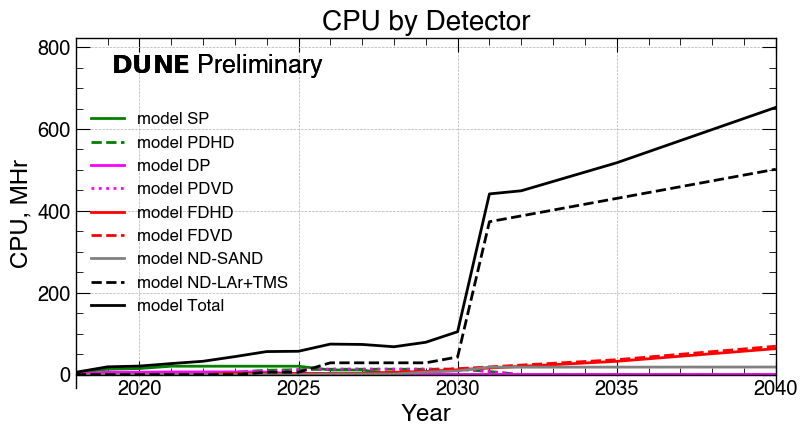

(-31.688271750000006, 685.4410367500001) (-31.688271750000006, 822.5292441)


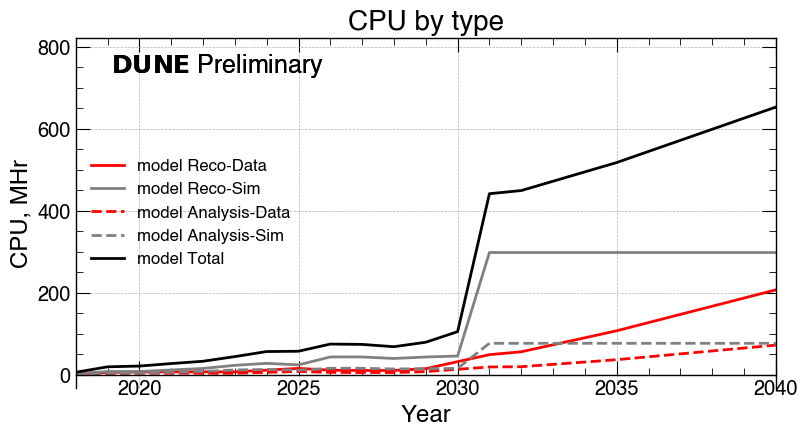

sumover ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS']
{'Detectors': ['SP', 'PDHD', 'DP', 'PDVD', 'FDHD', 'FDVD', 'ND-SAND', 'ND-LAr+TMS'], 'DataTypes': ['Reco-Sim', 'Reco-Data', 'Analysis-Data', 'Analysis-Sim', 'Total'], 'Resources': ['CPU', 'GPU'], 'Locations': ['ALL']}
['SP!Reco-Data!CPU!ALL!MHr', 'SP!Reco-Data!GPU!ALL!MHr', 'SP!Reco-Sim!CPU!ALL!MHr', 'SP!Reco-Sim!GPU!ALL!MHr', 'PDHD!Reco-Data!CPU!ALL!MHr', 'PDHD!Reco-Data!GPU!ALL!MHr', 'PDHD!Reco-Sim!CPU!ALL!MHr', 'PDHD!Reco-Sim!GPU!ALL!MHr', 'DP!Reco-Data!CPU!ALL!MHr', 'DP!Reco-Data!GPU!ALL!MHr', 'DP!Reco-Sim!CPU!ALL!MHr', 'DP!Reco-Sim!GPU!ALL!MHr', 'PDVD!Reco-Data!CPU!ALL!MHr', 'PDVD!Reco-Data!GPU!ALL!MHr', 'PDVD!Reco-Sim!CPU!ALL!MHr', 'PDVD!Reco-Sim!GPU!ALL!MHr', 'FDHD!Reco-Data!CPU!ALL!MHr', 'FDHD!Reco-Data!GPU!ALL!MHr', 'FDHD!Reco-Sim!CPU!ALL!MHr', 'FDHD!Reco-Sim!GPU!ALL!MHr', 'FDVD!Reco-Data!CPU!ALL!MHr', 'FDVD!Reco-Data!GPU!ALL!MHr', 'FDVD!Reco-Sim!CPU!ALL!MHr', 'FDVD!Reco-Sim!GPU!ALL!MHr', 'ND-SAND!Re

NameError: name 'EventTags' is not defined

In [9]:
print ("---------------  make analysis ------------------")
for detector in Detectors:
    for resource in ["CPU"]:   
        location = "ALL"
        recoAtag = holder.scale(detector,"Reco-Data",resource,location,Scales["Reco-Data-CPU"],{"DataTypes":"Analysis-Data"},config[detector]["Analysis-CPU"]*PerYear["Analysis-CPU"])
        simAtag = holder.scale(detector,"Reco-Sim",resource,location,Scales["Reco-Sim-CPU"],{"DataTypes":"Analysis-Sim"},config[detector]["Analysis-CPU"]*PerYear["Analysis-CPU"])
        print ("make analysis:",recoAtag,simAtag)


        
holder.debug = False

filter = {"Detectors":Detectors,"DataTypes":["Reco-Sim","Reco-Data","Analysis-Data","Analysis-Sim"],"Resources":["CPU","GPU"],"Locations":["ALL"]}
show = json.dumps(filter,indent=4)



CPUTotals=holder.sumAcrossFilters(\
    filter=filter,sumCat="DataTypes",sumName="Total")
holder.csvDump("after-total.csv")

print("-----------------------------------------------------------------------------------")
print (show)

filter2 = {"Detectors":Detectors,"DataTypes":["Reco-Sim","Reco-Data","Analysis-Data","Analysis-Sim"]+["Total"],"Resources":["CPU","GPU"],"Locations":["ALL"]}

CPUTotalsAllDetectors=holder.sumAcrossFilters(filter=filter2, sumCat="Detectors",sumName= "Total")
print ("DataTypes",DataTypes)

CPUByDetector = {"Detectors":Detectors+["Total"],"DataTypes":["Total"],"Resources":["CPU"],"Locations":["ALL"]}
CPUByType = {"Detectors":["Total"],"DataTypes":(DataTypes+["Total"]),"Resources":["CPU"],"Locations":["ALL"]}



holder.storeFilter(filter=CPUByDetector,name="CPUByDetector")
print ("CPUByType - dict",CPUByType)

holder.debug=False
#holder.storeFilter(filter=CPUByType,name="CPUByType")

#print ("CPUByType -list ",holder.filters["CPUByType"])
#holder.debug=False
holder.Draw(Title="CPU by Detector",YAxis="CPU",Category="Detectors",filter=CPUByDetector)

holder.Draw(Title="CPU by type",YAxis="CPU",Category="DataTypes",filter=CPUByType)

CPUTotalsAllDetectors=holder.sumAcrossFilters(filter=filter2, sumCat="Detectors",sumName= "Total")

holder.csvDump("after-total2.csv")

print (json.dumps(filter2,indent=4))


# CPUSlice = holder.makeSlice(criteria={"Detectors":Detectors,"Resources":["CPU"]},name="CPUSlice")

# CPUholder = DataHolder(theconfig=config)

# holder.copyToNewHolder(otherholder=CPUholder,slice=CPUSlice)



# holder.printSlice("CPUSlice")
# newtags = CPUholder.sumAcrossSlice(category="DataTypes",sumOver=["Analysis-Data","Analysis-Sim","Reco-Sim","Reco-Data"],slice="CPUSlice",sumName="Total")

# CPUholder.csvDump("CPUholder.csv")
# print (newtags)
            
            
#newtags = holder.sumAcross("DataTypes",["Total-Analysis","Reco-Data","Reco-Sim"])          

holder.csvDump("after-analyze.csv")



# EventTags = []
# RecoCPUTags = []

# for detector  in Detectors:
#     EventTags.append(holder.tag(detector,"Raw-Data","Store","ALL",Scales["Raw-Data-Store"]))
#     RecoCPUTags.append(holder.tag(detector,"Reco-Data","CPU","ALL",Scales["Reco-Data-CPU"]))
#     CPUTags
# if DRAW: CPUholder.Draw("CPU by Detector","Total","Detectors")

# sys.exit(1)
if DRAW: holder.Draw("Test1","Raw-Data","Detectors",EventTags)
if DRAW: holder.Draw("CPU","Reco-Data","Detectors",RecoCPUTags)

    # for datatype in ["Analysis"]:  # keep analyzing for a few years. 
    #     for resource in Resources:
    #         for location in Locations:
    #             newtag = holder.cumulateMe(detector,datatype,resource,location,"Datatypes",resource,factor)
       
    #     mc = extendMap(Years,Inputs[det]["Sim-CPU"],AnalysisExtend)
    #     if DEBUG: print ("mc",mc)
    #     for year in Years:
    #         total = data[year]
    #         total += mc[year]
    #         Inputs[det][key][year] = total *config[det]["Analysis-CPU"]  # this scales by a factor relative to reco/sim-MWC
        
    #     if DEBUG: print ("other key",det,key)



# do a little cleanup

# for det in Inputs.keys():
    
#     if "Sim-Memory" in Inputs[det]:
#         Inputs[det].pop("Sim-Memory")
#     if "Reco-Memory" in Inputs[det]:
#         Inputs[det].pop("Reco-Memory")


# In[ ]:


# make a data file which uses # of events to figure out how big samples are

if PerYear["Reco-Data-Store"]!=PerYear["Reco-Data-CPU"]:
    print ("Data growth has to match reprocessing cycles/year")
    PerYear["Reco-Data-Store"] = PerYear["Reco-Data-CPU"]
if PerYear["Reco-Sim-Store"]!=PerYear["Reco-Sim-CPU"]:
    print ("Sim growth has to match reprocessing cycles/year")
    PerYear["Reco-Sim-Store"] = PerYear["Reco-Sim-CPU"]

#Data = {}
#dump = open("dump.txt",'w')

    
#print (Inputs.keys())
# fields = config["Scales"]
# print ("fields",fields)
# for dtype in fields:
#     Data[dtype] = {}
#     if "Memory" in dtype:
#         continue
#     for det in Detectors:
        
#         # this allows you to, say, do 2 passes of reco/year
        
#         # print("makeData",dtype, det, Inputs[det][dtype][year])
#         for year in Years:
#             Data[dtype][det][year] = float(Inputs[det][dtype][year]) * float(PerYear[dtype])
#         # compensate for nominal units being millions and TB or singles and MB
#         if Units[dtype] == "PB":
#             for year in Years:
#                 Data[dtype][det][year] *= 0.001
#         ds = "data %s %s %f\n"%(dtype,det,Data[dtype][det][2022])
#         dump.write(ds)


# - impose a cap at Cap (30 PB/year if set)

# In[ ]:


# impose a cap at Cap on things derived from raw data



dtype = "Raw-Store"

Data["Raw-Store"]["Total"] = {}
for year in Years:
    Data[dtype]["Total"][year] = 0.0
for det in Inputs.keys():

    for year in Years:
        
        Data[dtype]["Total"][year] +=  Data["Raw-Store"][det][year]
        
dtypes = ["Raw-Store"] #,"Reco-Data-CPU"]
for dtype in dtypes:
    for det in Inputs.keys():
        #print (dtype,det,2035,1.0,Data[dtype][det][2035] )
        for year in Years:
            cap = Data["Raw-Store"]["Total"][year]/Cap
           # print (dtype,det,year,cap,Data[dtype][det][year] )
            if cap > 1:
                Data[dtype][det][year] /=cap
        #print (dtype,det,2035,cap,Data[dtype][det][2035] )


# # Make a total across detectors

# In[ ]:


dtypes = ["Raw-Store","Reco-Data-Store","Sim-Store","Reco-Data-CPU","Sim-CPU","Analysis-CPU"]



for dtype in dtypes:
    Data[dtype]["Total"] ={}
    
        
    for year in Years:
        Data[dtype]["Total"][year] = 0.0
    for det in Inputs.keys():
        #if dtype != "Analysis":  # not certain what this does... I think it is leftover. 
        for year in Years:
            Data[dtype]["Total"][year]+=  Data[dtype][det][year] 
    
             
    


# In[ ]:


PlotYears = []
for i in range(MinYear,MaxYear+1):
    PlotYears.append(i)


# In[ ]:


PlotYears = []
for i in range(MinYear,MaxYear+1):
    PlotYears.append(i)
#PlotYears = Years
print ("PlotYears",PlotYears)
# draw things
things = list(Inputs.keys())+["Total"]

if DRAW:
    for stuff in ["Raw-Events","Test","Sim-Events","Raw-Store","Reco-Data-Store","Sim-Store","Reco-Data-CPU","Sim-CPU","Analysis-CPU","Reco-Data-GPU","Sim-GPU"]:
        DrawDet(shortname,stuff,PlotYears,Data,things,Units,DetColors,DetLines)

ToCSV2(shortname+"-Reco-Data-GPU","Reco-Data-GPU",PlotYears,Data,Units,Formats)
ToCSV2(shortname+"-Sim-GPU","Sim-GPU",PlotYears,Data,Units,Formats)


# In[ ]:


PlotYears = []
for i in range(MinYear,MaxYear+1):
    PlotYears.append(i)
#PlotYears = Years
print ("PlotYears",PlotYears)
# draw things
things = list(Inputs.keys())+["Total"]

print (Inputs.keys())
other = list(Inputs["ND-SAND"].keys())+["Total"]

print (other)


if DRAW:
    for stuff in ["Raw-Events","Test","Sim-Events","Raw-Store","Reco-Data-Store","Sim-Store","Reco-Data-CPU","Sim-CPU","Analysis-CPU"]:
        DrawDet(shortname,stuff,PlotYears,Data,things,Units,DetColors,DetLines)



# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:


# merge protodune info

if DEBUG: print ("Data keys",Data.keys())

for dtype in Data.keys():
    if DEBUG: print ("Merge protodunes",dtype)
    det = "PDs" 
    Data[dtype][det] = {}
    for year in Years:  
        Data[dtype][det][year] = Data[dtype]["SP"][year] + Data[dtype]["DP"][year] + Data[dtype]["PDHD"][year] + Data[dtype]["PDVD"][year]

    Data[dtype].pop("SP")
    Data[dtype].pop("PDHD")
    Data[dtype].pop("DP")
    Data[dtype].pop("PDVD")
    


# In[ ]:


# merge far detector into "FDs
if "HD" in Detectors and "VD" in Detectors:
    for dtype in Data.keys():
        det = "FDs"
        print ("merge FDS",dtype)
        Data[dtype][det] =  {}
        for year in Years:  
            Data[dtype][det][year] = Data[dtype]["HD"][year] + Data[dtype]["VD"][year]
        Data[dtype].pop("HD")
        Data[dtype].pop("VD")
        
# for dtype in Data.keys():
#         det = "FDs"
#         Data[dtype][det] =  {}
#         for year in Years:  
#             Data[dtype][det][year] = 0
        
# for subdet in ["Calib","HighE","LowE","LBL","Calib","TP"]:
#     for dtype in Data.keys():
#         det = "FDs"
#         print ("merge FDS",dtype)
        
#         for year in Years:  
#             Data[dtype][det][year] += Data[dtype][subdet][year] 
#         Data[dtype].pop("subdet")


# In[ ]:


# make a total CPU category

Data["Total-CPU"]={}

for det in CombinedDetectors:
    Data["Total-CPU"][det] =  {}
    for year in Years:
        Data["Total-CPU"][det][year] = Data["Reco-Data-CPU"][det][year] + Data["Sim-CPU"][det][year] + Data["Analysis-CPU"][det][year]
    #print(det,Data["Total-CPU"][det])


# In[ ]:


# make totals across categories. 

DataTypes = list(Data.keys())

for dt in DataTypes:
    Data[dt]["Total"] = {}
    for year in Years:
        Data[dt]["Total"][year]=0.0
    for k in Data[dt].keys():
        if k == "Total":
          continue  
        for year in Years:
            Data[dt]["Total"][year] += Data[dt][k][year]
    


# In[ ]:


# and make a special data type for cores

Data["Cores"] = {}
Data["HS23"] = {}
Data["Wall"] = {}
 
MHrsPerYear = 1000000/365./24.
print ("MHrsPerYear",MHrsPerYear)
print ("total-CPU keys",Data["Total-CPU"].keys())
for k in Data["Total-CPU"].keys():
#     if "MARS" not in k :
#         efficiency = config["Cores"]["Efficiency"]
#     else:
#         efficiency = 1

    scaleTo2020 = config["Cores"]["2020Units"]
    Data["Cores"][k]={}
    Data["Wall"][k]={}
    Data["HS23"][k]={}
#    Data["WALL"][k]={}
    for year in Years:
        Data["Wall"][k][year] = Data["Total-CPU"][k][year]/scaleTo2020/efficiency
        Data["Cores"][k][year] = Data["Total-CPU"][k][year]*MHrsPerYear/scaleTo2020/efficiency
        Data["HS23"][k][year] = Data["Total-CPU"][k][year]*MHrsPerYear/scaleTo2020/efficiency*config["kHEPSPEC06PerCPU"]
#        Data["WALL"][k][year] = Data["Total-CPU"][k][year]*MHrsPerYear/efficiency/scaleTo2020


# # Yearly info:

# In[ ]:


Types = CombinedDetectors+["Analysis","Total"] 
if DRAW:
    DrawDet(shortname+"_byyear","Total-CPU",PlotYears,Data,Types,Units,DetColors,DetLines)#,cpuactual)
    DrawDet(shortname+"_byyear","Cores",PlotYears,Data,Types,Units,DetColors,DetLines)#,coreactual)
    DrawDet(shortname+"_byyear","Wall",PlotYears,Data,Types,Units,DetColors,DetLines)#,wallactual)
    DrawDet(shortname+"_byyear","HS23",PlotYears,Data,Types,Units,DetColors,DetLines)#,wallactual)


# In[ ]:


#  for Storage work out split between different institutions

Splits = {}
for f in SplitsEarly:
    Splits[f] = {}
    for t in SplitsEarly[f]:
        Splits[f][t] = {}
        for loc in SplitsEarly[f][t]: 
            Splits[f][t][loc] = {}
            #print (f,t,Splits[f][t],Splits[f][t][0])
    
            for y in Years:
                if y < SplitsYear:
                    Splits[f][t][loc][y]=SplitsEarly[f][t][loc]
                else:
                    Splits[f][t][loc][y]=SplitsLater[f][t][loc]


# In[ ]:


if DEBUG: print (Splits["CPU"])

for key in ["Total-CPU","Cores","HS23","Wall"]: 
    
    for site in ["FNAL","CERN","Global"]:
        Data[key][site] = {}
        for year in Years:
            
            Data[key][site][year] = Data[key]["Total"][year]*Splits["CPU"]["CPU"][site][year]
            


# # here is where we start doing cumulation across years for disk and reconstruction

# In[ ]:


# now do some Cumulative-work.  Stuff stays on tape/disk for different amounts of time and we have multiple copies

Storage = {}
for k in StorageTypes:
    Storage[k] = {}
Storage["Total"] = {}
Storage["Global"] = {}
Storage["FNAL"] = {}
Storage["CERN"] = {}
Storage["Total"]["Cumulative-Tape"] = {}
Storage["Total"]["Cumulative-Disk"] = {}
Storage["FNAL"]["Cumulative-Tape"] = {}
Storage["FNAL"]["Cumulative-Disk"] = {}
Storage["CERN"]["Cumulative-Tape"] = {}
Storage["CERN"]["Cumulative-Disk"] = {}
Storage["Global"]["Cumulative-Tape"] = {}
Storage["Global"]["Cumulative-Disk"] = {}


for year in Years:
    Storage["Total"]["Cumulative-Tape"][year] = 0.0
    Storage["Total"]["Cumulative-Disk"][year] = 0.0

for k in StorageTypes:
    Storage[k]["Tape"] = {}
    Storage[k]["Disk"] = {}
    for year in Years:
        Storage[k]["Tape"][year] = Data[k]["Total"][year]*TapeCopies[k]
        Storage[k]["Disk"][year] = Data[k]["Total"][year]*DiskCopies[k]
    # extend disk for Analysis HMS 6-24-2023
    #Storage[k]["Disk"]  = extendMap(Years,Storage[k]["Disk"],AnalysisExtend) 
    
    Storage[k]["Cumulative-Tape"] = cumulateMap(Years,Storage[k]["Tape"],TapeLifetimes[k])
    Extend = cumulateMap(Years,Storage[k]["Disk"],DiskLifetimes[k])
    if k != "Test": 
        Storage[k]["Cumulative-Disk"] = extendMap(Years,Extend,AnalysisExtend,k)
    else:
        Storage[k]["Cumulative-Disk"] = Extend
    
    for year in Years:
        Storage["Total"]["Cumulative-Tape"][year] += Storage[k]["Cumulative-Tape"][year]
        Storage["Total"]["Cumulative-Disk"][year] += Storage[k]["Cumulative-Disk"][year]
    
    
        
for loc in Splits["Disk"]["Raw-Store"]:
    for year in Years:
        Storage[loc]["Cumulative-Disk"][year] = 0.0
        Storage[loc]["Cumulative-Tape"][year] = 0.0       
        for k in StorageTypes:
              Storage[loc]["Cumulative-Disk"][year] += Storage[k]["Cumulative-Disk"][year]*Splits["Disk"][k][loc][year]
              Storage[loc]["Cumulative-Tape"][year] += Storage[k]["Cumulative-Tape"][year]*Splits["Tape"][k][loc][year]


# cdisk = SumOver1("Cumulative-Disk",Data)
# print ("sum over",cdisk)

# for year in Years:
#         Data[loc]["Cumulative-Disk"][year] = 0.0
#         Data[loc]["Cumulative-Tape"][year] = 0.0       
#         for k in StorageTypes:
#               Data[loc]["Cumulative-Disk"][year] += Data[k]["Cumulative-Disk"][year] 
#               Data[loc]["Cumulative-Tape"][year] += Data[k]["Cumulative-Tape"][year] 


# In[ ]:


texfile.write("\\section{Projected Disk and Tape needs by source and site}\n")
#ToCSV1(shortname+"-Disk_by_location","Cumulative-Disk",PlotYears,Storage,Units,Formats)
#ToCSV1(shortname+"-Tape_by_location","Cumulative-Tape",PlotYears,Storage,Units,Formats)
# s = "\\begin{table}[h]\n \\centering\\csvautotabularright\
# {external/DUNERSEUSAGE-2022-11-14.csv}\n \\label{Cumulative-Tape}\n\
# \\caption{Rucio report on storage usage 2022-11-14 from the Scotgrid Dashboard \
# \\href{https://dune.monitoring.edi.scotgrid.ac.uk/app/dashboards}{https://dune.monitoring.edi.scotgrid.ac.uk/app/dashboards}.}\n \\end{table}\n"
# s.replace("_","\_")
# texfile.write(s)

# s = TableTex(shortname+"-Disk_by_location","Disk requests by location. The top 4 lines show the source, the bottom 4 show the locations requested and the total request.","Cumulative-Disk"+"\n")
# texfile.write(s)
# s = TableTex(shortname+"-Tape_by_location","Tape requests by location. The top 4 lines show the source, the bottom 4 show the locations requested and the total request.","Cumulative-Tape"+"\n")
# texfile.write(s)

# texfile.write("\\clearpage\n")


# In[ ]:


# now do some plots

Types = CombinedDetectors+["Analysis","Total"]

cpuactual = []
coreactual = []
wallactual = []

Sites = ["FNAL","CERN","Global","Total"]

if DRAW:
    DrawDet(shortname,"Total-CPU",PlotYears,Data,Types,Units,DetColors,DetLines,cpuactual)
    DrawDet(shortname,"Cores",PlotYears,Data,Types,Units,DetColors,DetLines,coreactual)
    DrawDet(shortname,"Wall",PlotYears,Data,Types,Units,DetColors,DetLines,wallactual)
    DrawDet(shortname,"HS23",PlotYears,Data,Types,Units,DetColors,DetLines,wallactual)



# DrawDet(shortname,"Total-CPU",PlotYears,Data,Sites,Units,DetColors,DetLines,cpuactual)
# DrawDet(shortname,"Cores",PlotYears,Data,Sites,Units,DetColors,DetLines,coreactual)
# #DrawDet(shortname,"WALL",PlotYears,Data,Types,Units,DetColors,DetLines,wallactual)
# DrawDet(shortname,"HS23",PlotYears,Data,Sites,Units,DetColors,DetLines,wallactual)



for x in ["Total-CPU","Cores","HS23","Wall"]:
    ToCSV2(shortname+"-"+x,x,PlotYears,Data,Units,Formats)


# In[ ]:


Captions2 = {"Raw-Events":"Projected million of detector events per year.  Reconstructed data resources are based on this number.",
"Test":"Projected PB of Test data per year.",
"Sim-Events":"Projected millions of simulated events per year. Simulated data resources are based on this number. ",
"Raw-Store":"Projected raw data written per year in PB, derived from the number of events.",
"Reco-Data-CPU":"Projected CPU needs in core-hrs for data reconstruction. \
             Slot weighted wall time takes into account memory use and an efficiency correction.  Assumes rereconstruction of several years of older data.",
"Sim-CPU":"Projected CPU needs in core-hrs for simulation and reconstruction. \
             Slot weighted wall time takes into account memory use and an efficiency correction. Based directly on the number of simulated Events.",
"Reco-Data-Store":"Projected PB of reconstructed data per year. Includes reprocessing.",
"Sim-Store":"Projected PB of simulated data/year",
"Total-CPU":"Slot weighted CPU needs in core-years. Slot weighted wall time takes into account memory and efficiency.",
"Cores":"Slot weighted CPU needs in number of cores. Slot weighted wall time takes into account memory and efficiency.",
"HS23":"Slot weighted CPU needs in kHS23 hrs. Slot weighted wall time takes into account memory and efficiency.",
"Analysis-CPU":"Slot weighted analysis CPU needs in core-hrs. Assumed to be a weighted fraction of reco+sim needs.",
            }
print (Data["Raw-Events"]["PDs"])
#print (Data["Raw-Events"]["FDs"])
print (Data["Raw-Events"]["ND-SAND"])

    


# In[ ]:





# In[ ]:


# for key in ["Cores","Total-CPU","HS23"]:
#     print ("Got to Here")
#     if not key in Units:
#         print ("no units for key",key)
#         continue
#     ToCSV2(shortname+"-"+key,key,PlotYears,Data,Units,Formats)
#     s = TableTex(shortname+"-"+key,Captions2[key],key+"\n")
#     #DrawDet(shortname,key,PlotYears,Data,list(Data[key].keys()),Units,DetColors,DetLines)
#     #s2 = DrawTex(shortname,key+".png",Captions2[key],key)
#     print  ("Got to here")
#     s2 = BothTex(shortname,key+".png",Captions2[key],key)
#     #texfile.write(s2)
#     tablefile.write(s2)


# In[ ]:


print (Storage.keys())
    
Captions1 = {"Cumulative-Tape":"Cumulative Tape needs in PB. Includes multiple copies and data lifetimes.\
 The top 4 lines show the source of the data while the last four propose responsibilities.", 
             "Cumulative-Disk":"Cumulative Disk needs in PB. Includes multiple copies and data lifetimes.\
 The top 4 lines show the source of the data while the last four propose responsibilities.",
            "HS23":"CPU needs in HS23 units"}
            

for key in ['Cumulative-Tape', 'Cumulative-Disk']:
    if not key in Units:
        print ("no units for key",key)
        continue
    # actual = None
    # if key == "Cumulative-Tape":
    #     actual = tapeactual
    # if key == "Cumulative-Disk":
    #     actual = diskactual
    # print (actual)
    ToCSV1(shortname+"-"+key,key,PlotYears,Storage,Units,Formats)
    ToCSV1(shortname+"-"+key+"-Source",key,PlotYears,Storage,Units,Formats,['Raw-Store', 'Test', 'Reco-Data-Store', 'Sim-Store', 'Total'])
    ToCSV1(shortname+"-"+key+"-Request",key,PlotYears,Storage,Units,Formats,['Global', 'FNAL', 'CERN', 'Total'])
    s = TableTex(shortname+"-"+key,Captions1[key],key+"\n")
    print (key,s)
    dunestyle.Preliminary()
    DrawType(shortname,key,PlotYears,Storage,StorageTypes+["Total"],Units,TypeColors,TypeLines)
 
    s2 = BothTex(shortname,key+".png",Captions1[key],key)

    #texfile.write(s2)
    texfile.write(s2)


# In[ ]:


print (Types)

for key in Types:
    if not key in Units:
        print ("no units for key",key)
        continue
    ToCSV2(shortname+"-"+key,key,PlotYears,Data,Units,Formats)
    s = TableTex(shortname+"-"+key,Captions2[key],key+"\n")
    DrawDet(shortname,key,PlotYears,Data,list(Data[key].keys()),Units,DetColors,DetLines)
    #s2 = DrawTex(shortname,key+".png",Captions2[key],key)
    s2 = BothTex(shortname,key+".png",Captions2[key],key)
    #texfile.write(s2)
    tablefile.write(s2)

for key in Sites:
    if not key in Units:
        print ("no units for key",key)
        continue
    ToCSV2(shortname+"-"+key,key,PlotYears,Data,Units,Formats)
    s = TableTex(shortname+"-"+key,Captions2[key],key+"\n")
    DrawDet(shortname,key,PlotYears,Data,list(Data[key].keys()),Units,DetColors,DetLines)
    #s2 = DrawTex(shortname,key+".png",Captions2[key],key)
    s2 = BothTex(shortname,key+".png",Captions2[key],key)
    #texfile.write(s2)
    tablefile.write(s2)
        


# In[ ]:


tapepoints = np.zeros(len(Years))
diskpoints = np.zeros(len(Years))

#DrawType(shortname,"Tape",Years,Data,StorageTypes+["Total"],Units,TypeColors,TypeLines,None,None)
#DrawType(shortname,"Cumulative-Tape",PlotYears,Storage,StorageTypes+["Total"],Units,TypeColors,TypeLines,None,None)
#DrawType(shortname,"Cumulative-Disk",PlotYears,Storage,StorageTypes+["Total"],Units,TypeColors,TypeLines,None,None)
#DrawType(shortname,"Cumulative-Disk",Years,Data,StorageTypes+["Total"],Units,TypeColors,TypeLines,None,None)



# In[ ]:


tablefile.close()
#texfile.write("\\input{bibmaker.tex}\n")
#texfile.write("\\clearpage\n")
#texfile.write("\\section{Appendix - Model inputs}\n")
#texfile.write("\\input{"+dirname+"/tables.tex}\n")
#texfile.write("\\end{document}\n")
texfile.close()


       


# In[ ]:


# make a set of request numbers to add to the tex file - they need to have tex compatible nicknames

macro = open(shortname+"_macros.tex",'w')

command = makeParameter("HS23Request","%10.0f"%(Data["HS23"]["Total"][RequestYear]))
print ("tex command", command,Data["HS23"]["Total"][RequestYear])

Requests = {}
Requests["CPU"]="HS23"
Requests["CORES"]="Cores"

Requests["DISK"]="Cumulative-Disk"
Requests["TAPE"]="Cumulative-Tape"

m = makeParameter("ThisYear","%d"%RequestYear)
macro.write(m+"\n")

for y in Requests:
    for x in Sites:
        name = ("%s%s"%(y,x)).replace("-","")
        if y == "CPU" or y == "CORES":
            if y == "CPU": 
                m = makeParameter(name,"%10.1f"%(Data[Requests[y]][x][RequestYear]))
            else: 
                m = makeParameter(name,"%10.0f"%(Data[Requests[y]][x][RequestYear]))
        else:
            m = makeParameter(name,"%10.1f"%(Storage[x][Requests[y]][RequestYear]))
        macro.write(m+"\n")
macro.close()



# In[ ]:


jname = configfilename.replace(".json","_internal.json")
jj = open(jname,'w')
commentjson.dump(Data,jj,indent=4)
jj.close()


# In[ ]:


#cmd='pdflatex MoreSim_2023-06-22-2040.tex'
#get_ipython().system('{cmd}')